In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import time


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv")
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [3]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


the dataset has 8 columns of different data types

##### data wrangling 

In [4]:
#checiking for null values
df.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

there are null values in most of the columns , we have to clean the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [6]:
#filling null values with mode fr categorical data and mean for continous data
df["Time_spent_Alone"] = df["Time_spent_Alone"].fillna(df["Time_spent_Alone"].mean())
df["Stage_fear"] = df["Stage_fear"].fillna(df["Stage_fear"].mode()[0])
df["Social_event_attendance"] = df["Social_event_attendance"].fillna(df["Social_event_attendance"].mean())
df["Going_outside"] = df["Going_outside"].fillna(df["Going_outside"].mean())
df["Drained_after_socializing"] = df["Drained_after_socializing"].fillna(df["Drained_after_socializing"].mode()[0])
df["Friends_circle_size"] = df["Friends_circle_size"].fillna(df["Friends_circle_size"].mean())
df["Post_frequency"] = df["Post_frequency"].fillna(df["Post_frequency"].mean())



In [7]:
df.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

#### Exploratory Data Analaysis and Visualization

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time_spent_Alone,2900.0,4.505816,3.441180,0.0,2.0,4.000000,7.0,11.0
Social_event_attendance,2900.0,3.963354,2.872608,0.0,2.0,3.963354,6.0,10.0
Going_outside,2900.0,3.000000,2.221597,0.0,1.0,3.000000,5.0,7.0
Friends_circle_size,2900.0,6.268863,4.232340,0.0,3.0,5.000000,10.0,15.0
Post_frequency,2900.0,3.564727,2.893587,0.0,1.0,3.000000,6.0,10.0


### Univariate

In [9]:
import plotly.express as px
for num_col in df.select_dtypes(exclude="object").columns:
    fig = px.histogram(df, x=num_col, title=f"Distribution of {num_col}")
    fig.show()
    


* Time_Alone - A majority in the dataset spend less than 3 hours alone, with most of them spending 0 hours alone
* Social Event Attendance - Majority of people have a frequency of 2 in attending social events
* Friends_Circle_Size - Most people had a circle of 5 friends, but a06 people had 0 friends,
* Posting Social media- Most people post averagey 2 posts, a frequency of 2
  

In [10]:
#distribution for categorical columns using piechart for visualization
for cat_col in df.select_dtypes("object").columns:
    fig = px.pie(df, names=cat_col,title=f"Distribution of {cat_col}"
)
    fig.show()

* Majority of people in the dataset had no Stage Fear, but the margin was a small difference
* 48% of the people felt drained after socializing
* 51% of people are EXtroverts

#### Multivariate 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


* Almost 90% of those with No Stage fear were Extroverts, Almost 90% of those with stage-Fear were Introverts,
* Extroverts showed no Stage Fear
* INtroverts shows alot of Stage Fear


In [12]:
for cols in df.select_dtypes(exclude="object").columns:
    group = df.groupby("Personality")[cols].sum()
    fig = px.bar(
        x=group.index, 
        y=group.values, 
        color=group.index,
        labels={"x": "Personality", "y": f"Total {cols}"},
        color_discrete_sequence=px.colors.qualitative.Dark2,
        title=f"{cols} vs Personality Type"
    )
    fig.show()
   

* Introverts spent as total of 10 thousand hours alone, while extroverts spent just 3 hours alone
* Extroverts had a higher frequency in attending social events as compared to introverts, with almost a double margin
* Extroverts had a high frequency in Going outisde, as compared to Introverts.
* Extroverts had a total of 13,000 friends_circle size, while Introverts had a total of 4.1k friends in circle, refelcting Extrovetrs have a high number of Friends in a circle
* Extrovers posted 4 timies as much as Introverts did. 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [14]:
DA = df.groupby(["Drained_after_socializing", "Personality"])["Time_spent_Alone"].sum().reset_index()
fig=px.bar(DA, x="Personality", y="Time_spent_Alone", color="Drained_after_socializing", 
          title="Time_spent _alone vs  Personality Type featuring Drained after socializing", barmode="group",
          color_discrete_sequence=px.colors.qualitative.Dark2)
fig.show()

* Extroverts, spent less time Alone, and They and did not feel drained after socializing
* Introverts, felt more drained after socialing, thus can explain why  they spend more time alone

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [16]:
df.Stage_fear.value_counts()

Stage_fear
No     1490
Yes    1410
Name: count, dtype: int64

In [17]:
df.Drained_after_socializing.value_counts()

Drained_after_socializing
No     1493
Yes    1407
Name: count, dtype: int64

In [18]:
df.Personality.value_counts()

Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64

#### Data Preprocessing 

##### Label Encoding

In [19]:
import time
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error

In [20]:
#label encoding, for machine learning algorithms
for col in df.select_dtypes("object").columns:
    le=LabelEncoder()
    df[col] = le.fit_transform(df[col])


* Stage Fear: 0 - NO, 1- YES
* Drained: 0- NO, 1-YES
* Personality :0- EXTROVERTS, 1-INTROVERTS




In [21]:
#checking for correlation
df.corr().T

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
Time_spent_Alone,1.000000,0.834469,-0.718139,-0.735247,0.832117,-0.701665,-0.718072,0.712468
Stage_fear,0.834469,1.000000,-0.831737,-0.855403,0.956518,-0.810046,-0.826483,0.847467
Social_event_attendance,-0.718139,-0.831737,1.000000,0.731941,-0.830611,0.718518,0.727732,-0.721520
Going_outside,-0.735247,-0.855403,0.731941,1.000000,-0.852969,0.718327,0.754758,-0.739251
Drained_after_socializing,0.832117,0.956518,-0.830611,-0.852969,1.000000,-0.805234,-0.823028,0.845388
Friends_circle_size,-0.701665,-0.810046,0.718518,0.718327,-0.805234,1.000000,0.690381,-0.687203
Post_frequency,-0.718072,-0.826483,0.727732,0.754758,-0.823028,0.690381,1.000000,-0.721062
Personality,0.712468,0.847467,-0.721520,-0.739251,0.845388,-0.687203,-0.721062,1.000000


<Axes: >

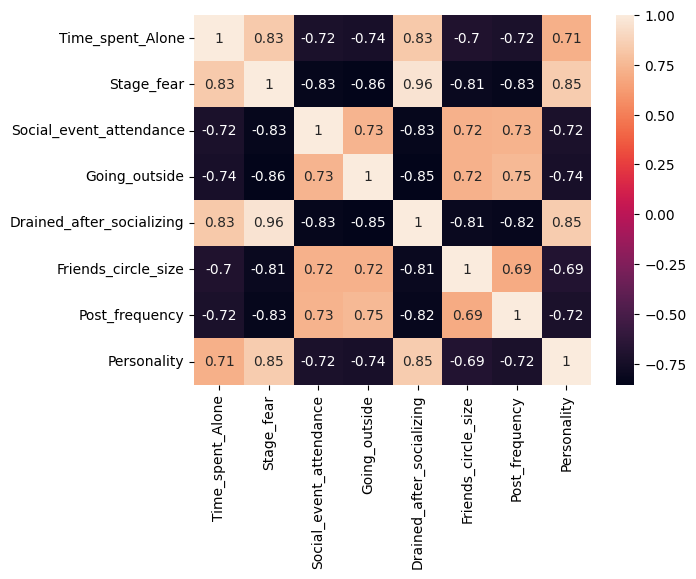

In [22]:
sns.heatmap(df.corr(), annot=True)

### Predictive Modelling

### Data Splitting

In [23]:
X = df.iloc[:,:7] 
y = df.iloc[:,7]

In [24]:
X_train, X_test, y_train,y_test = train_test_split(X, y, train_size=0.8)

In [25]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,9.0,1,0.0,0.0,1,0.0,3.0,1
2,9.0,1,1.0,2.0,1,5.0,2.0,1
3,0.0,0,6.0,7.0,0,14.0,8.0,0
4,3.0,0,9.0,4.0,0,8.0,5.0,0


In [26]:
#building models
models = {
    "Logistic Regression":LogisticRegression(),
    "Support Vector Machine":SVC(),
    "Decesion Tree":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
}

results_classification = []

for name, model in models.items():
    start_time= time.time()
    #training models
    model.fit(X_train,y_train)
    #prediction
    pred = model.predict(X_test)
    #model evaluation
    acc = accuracy_score(y_test, pred) * 100
    end_time=time.time()
    elapsed_time=end_time-start_time
    
    results_classification.append({
    "model": name,
    "accuracy_score": acc,
    "time": elapsed_time
})

# Put the DataFrame creation OUTSIDE the loop
data_results_classification = pd.DataFrame(results_classification)
print(data_results_classification)

                    model  accuracy_score      time
0     Logistic Regression       92.931034  0.251070
1  Support Vector Machine       94.310345  0.126834
2           Decesion Tree       86.379310  0.007000
3  RandomForestClassifier       92.758621  0.251078


Text(0.5, 1.0, 'Model Accuracy (R-squared) Comparison')

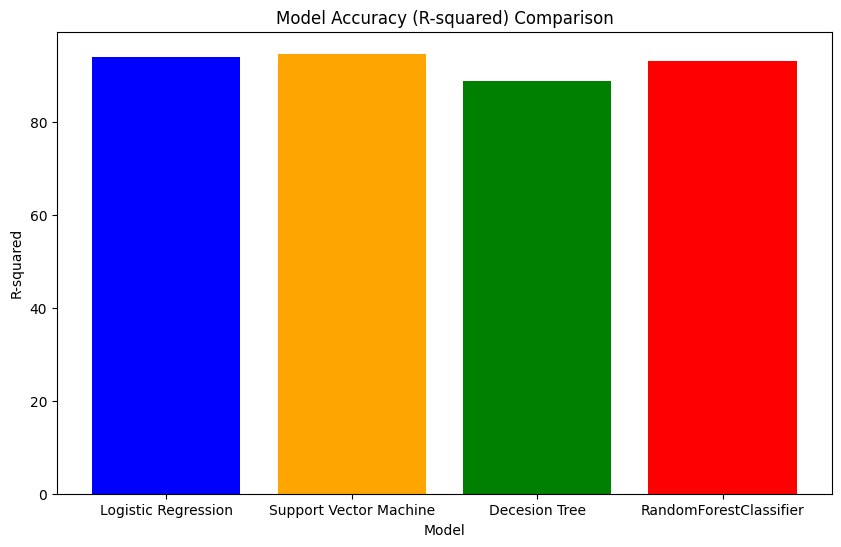

In [27]:
import matplotlib.pyplot as plt

models_names = ['Logistic Regression', 'Support Vector Machine', 'Decesion Tree', 'RandomForestClassifier']
accuracy_scores = [93.965517,94.655172,88.793103,93.103448] 
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models_names, accuracy_scores, color=['blue', 'orange', 'green', 'red'])

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('Model Accuracy (R-squared) Comparison')

Support Vector Machine Produced the highest accuracy result with a 94% score, followed closley by Logistic Regression with 93%, 